# IACOV - Model Development for Prognosis - ICU
## Strategy 1) Training using one hospital data and testing with 30% of the same hospital

First we import the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# para evitarmos a exibição dos dados em notacao científica
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#comment next line to not use MLFlow for cleaning data
from MLFlow_Classification import *
from MLFlow_Utils import *

C:\Users\carin\AppData\Local\Temp\ipykernel_22556\2463766658.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### This code uses just 14 hospitals, since ICU or MV has no variation for 4 hospitals
#### - The code that prepares the data to run all strategies for ICU and MV is: PREPARING_DATA_TO_UCI_MV_ANALYSES
#### - df_iacov_en.csv (used for death) was replaced here by df_iacov_model_lean_14hosp.csv
#### - put df_iacov_model_lean_14hosp.csv in same folder as this notebook

In [2]:
#Put csv in same folder as this notebook - for ICU we called df_iacov_model_lean_14hosp isntead of df_iacov_en.csv
dataset = pd.read_csv("df_iacov_model_lean_14hosp.csv", delimiter=";")
df_iacov_model = pd.DataFrame(dataset)
df_iacov_model.shape

(6046, 30)

In [3]:
df_iacov_model.columns

Index(['city_hospital', 'age', 'male', 'race', 'heart_rate', 'resp_rate',
       'sys_press', 'dias_press', 'mean_press', 'temp', 'hemoglobin',
       'platelets', 'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv',
       'leukocytes', 'neutrophil', 'lymphocytes', 'basophils', 'eosinophils',
       'monocytes', 'crp', 'death', 'icu', 'mv', 'state', 'region', 'excluir'],
      dtype='object')

## 2.1) Assign binary outcome ICU to be predicted

### 2.1.1) Maintain essential variables (LEAN Model)

In [4]:
#22 predictors + outcome ICU
df_iacov_model_lean = df_iacov_model[['city_hospital'
                                      ,'age'
                                      ,'male'
                                      ,'heart_rate'
                                      ,'resp_rate'
                                      ,'sys_press'
                                      ,'dias_press'
                                      ,'mean_press'
                                      ,'temp'
                                      ,'hemoglobin'
                                      ,'platelets'
                                      ,'hematocrit'
                                      ,'red_cells_count'
                                      ,'hcm'
                                      ,'rdw'
                                      ,'mcv'
                                      ,'leukocytes'
                                      ,'neutrophil'
                                      ,'lymphocytes'
                                      ,'basophils'
                                      ,'eosinophils'
                                      ,'monocytes'
                                      ,'crp'
                                      ,'icu']]
df_iacov_model_lean.shape

(6046, 24)

In [5]:
df_iacov_model_lean.to_csv('df_iacov_model_lean.csv', sep=';', index=False)

### 2.1.2) Filter a specific hospital

In [6]:
#Put csv in same folder as this notebook
df_all_hospitals = pd.read_csv("df_iacov_model_lean.csv", delimiter=";", decimal=".")
df_all_hospitals.shape

(6046, 24)

In [7]:
column_summaries(df_all_hospitals)

,Missing Values,% missing of Total Values,# Unique Values,# Values as [0],datatype,skew,count,mean,std,min,25%,50%,75%,max
city_hospital,0,0.000,14,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,0,0.000,98,0,float64,-0.060,6046.000,57.521,17.869,18.000,44.000,58.000,71.000,105.000
male,0,0.000,2,2790,float64,-0.155,6046.000,0.539,0.499,0.000,0.000,1.000,1.000,1.000
heart_rate,809,13.381,183,0,float64,0.611,5237.000,85.689,17.209,13.000,75.000,85.000,96.000,233.000
resp_rate,1457,24.099,69,1,float64,2.897,4589.000,21.881,6.380,0.000,18.000,20.000,24.000,108.000
sys_press,1336,22.097,215,0,float64,-0.279,4710.000,124.054,22.791,10.000,110.000,122.000,138.000,242.000
dias_press,1325,21.915,150,0,float64,-0.361,4721.000,74.608,14.626,6.000,67.000,76.000,81.000,141.000
mean_press,1366,22.593,1452,326,float64,-1.751,4680.000,83.731,28.475,0.000,78.981,90.000,98.648,166.000
temp,1173,19.401,128,1,float64,62.972,4873.000,36.430,4.976,0.000,36.000,36.300,36.800,372.000
hemoglobin,1904,31.492,226,0,float64,-0.628,4142.000,12.752,2.189,1.400,11.692,13.000,14.200,30.600


In [8]:
import ipywidgets as widgets
from IPython.display import clear_output

In [9]:
df_all_hospitals.city_hospital.value_counts()

city_hospital
HC_USP                        1500
HOSPPORTUGUES_SALVADOR        1359
CEARA_UNIMED                   845
HRL_2021_02                    539
HMV_POA_02                     456
RIO_DE_JANEIRO_UNIMED          449
HOSPSANTAJULIA_MANAUS          247
HOSPSANTACATARINABLUMENAU      148
HOSPSAOFRANCISCO_MOGIGUACU     124
PERNAMBUCO_FULL                112
PELOTAS                         91
CEARA_HUWC                      73
HEVV                            56
AMAZONAS_HUGV                   47
Name: count, dtype: int64

In [10]:
# Hospitals excluded for ICU and MV analyses: 'HOSPSANTACASASP_FULL', 'HOSPGRUPOSANTA', 'HUTRIN_2021_02', 'RIO_DE_JANEIRO_HUCFF'
dropdown_hospital = widgets.Dropdown(options = ['Choose a hospital ...'
                                                ,'HC_USP'                     #SP
                                                ,'HOSPPORTUGUES_SALVADOR'     #BA
                                                ,'CEARA_UNIMED'               #CE
                                                ,'HRL_2021_02'                #GO - Luiziania
                                                ,'HMV_POA_02'                 #RS - Moinhos de Vento
                                                ,'RIO_DE_JANEIRO_UNIMED'      #RJ
                                                ,'HOSPSANTAJULIA_MANAUS'      #AM
                                                ,'HOSPSANTACATARINABLUMENAU'  #SC
                                                ,'HOSPSAOFRANCISCO_MOGIGUACU' #SP
                                                ,'PERNAMBUCO_FULL'            #PE
                                                ,'PELOTAS'                    #RS
                                                ,'CEARA_HUWC'                 #CE
                                                ,'HEVV'                       #ES - Vila Velha
                                                ,'AMAZONAS_HUGV'              #AM
#                                                 ,'GHC_02'                     #RS
                                               ])

In [11]:
specific_hospital = 'Choose a hospital ...'
df_iacov_model_lean = df_all_hospitals

def dropdown_hospital_eventhandler(change):
    global specific_hospital 
    specific_hospital = change.new
    dropdown_hospital.observe(dropdown_hospital_eventhandler, names='value')

# df_iacov_model_lean[df_iacov_model_lean.city_hospital == specific_hospital].shape

In [12]:
dropdown_hospital.observe(dropdown_hospital_eventhandler, names='value')

**Select Hospital to train**

In [14]:
display(dropdown_hospital)

Dropdown(index=8, options=('Choose a hospital ...', 'HC_USP', 'HOSPPORTUGUES_SALVADOR', 'CEARA_UNIMED', 'HRL_2…

### df_single_hospital is the data of hospital selected

In [15]:
df_single_hospital = df_all_hospitals[df_all_hospitals.city_hospital == specific_hospital]
df_single_hospital.shape

(148, 24)

In [16]:
column_summaries(df_single_hospital)

,Missing Values,% missing of Total Values,# Unique Values,# Values as [0],datatype,skew,count,mean,std,min,25%,50%,75%,max
city_hospital,0,0.000,1,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,0,0.000,60,0,float64,0.339,148.000,49.622,17.794,18.000,38.000,47.500,62.000,95.000
male,0,0.000,2,71,float64,-0.082,148.000,0.520,0.501,0.000,0.000,1.000,1.000,1.000
heart_rate,6,4.054,50,0,float64,0.339,142.000,87.056,14.191,51.000,78.000,87.000,96.000,130.000
resp_rate,3,2.027,12,0,float64,2.081,145.000,19.048,2.222,16.000,18.000,18.000,20.000,30.000
sys_press,1,0.676,57,0,float64,-0.085,147.000,126.109,20.948,18.000,114.000,124.000,137.000,196.000
dias_press,1,0.676,48,0,float64,0.014,147.000,78.116,12.388,37.000,70.000,77.000,85.500,112.000
mean_press,1,0.676,53,0,float64,-0.161,147.000,94.116,14.156,30.000,86.000,93.000,102.000,137.000
temp,2,1.351,35,0,float64,0.524,146.000,36.762,0.826,34.500,36.300,36.600,37.100,39.800
hemoglobin,0,0.000,52,0,float64,-1.074,148.000,13.549,1.519,6.400,12.875,13.700,14.500,16.700


### 2.1.3) Dropping unused variables - city_hospital

In [17]:
df_single_hospital = df_single_hospital.drop(['city_hospital'],axis=1)
df_single_hospital.shape

(148, 23)

In [18]:
#Preencho NAs com 0 
df_single_hospital['icu'] = df_single_hospital['icu'].fillna(0)
df_single_hospital.icu.value_counts()

icu
0    127
1     21
Name: count, dtype: int64

In [19]:
(df_single_hospital.icu.value_counts()/len(df_single_hospital))*100

icu
0   85.811
1   14.189
Name: count, dtype: float64

### From now on the outcome will call CLASS

In [20]:
df_single_hospital['class'] = df_single_hospital['icu'].astype('int')
df_single_hospital = df_single_hospital.drop(['icu'],axis=1)

### 2.1.4) Recalculating null mean_press

In [21]:
def isNullMeanPressure(row):

    if pd.isnull(row['mean_press']):
    
        if pd.notnull(row['sys_press']) and pd.notnull(row['dias_press']):
            return (row['sys_press']+row['dias_press'])/2
        else:
            return row['mean_press']
    else:
        return row['mean_press']

In [22]:
#Check mean_press missing before recalculating
#column_summaries(df_single_hospital)

In [23]:
df_single_hospital['mean_press'] = df_single_hospital.apply(isNullMeanPressure, axis=1)

In [24]:
#Check mean_press missing after recalculating
#column_summaries(df_single_hospital)

## 2.2) Prepare Experiment

1. First, create your experiment 

In [25]:
df_single_hospital.shape

(148, 23)

In [26]:
#import inspect
#inspect.getsource(setup)

__Atention!__: If any Dtype is bool, cast to int32, otherwise experiment will fail

In [27]:
df_single_hospital.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148 entries, 3880 to 4027
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              148 non-null    float64
 1   male             148 non-null    float64
 2   heart_rate       142 non-null    float64
 3   resp_rate        145 non-null    float64
 4   sys_press        147 non-null    float64
 5   dias_press       147 non-null    float64
 6   mean_press       147 non-null    float64
 7   temp             146 non-null    float64
 8   hemoglobin       148 non-null    float64
 9   platelets        148 non-null    float64
 10  hematocrit       148 non-null    float64
 11  red_cells_count  148 non-null    float64
 12  hcm              148 non-null    float64
 13  rdw              148 non-null    float64
 14  mcv              148 non-null    float64
 15  leukocytes       148 non-null    float64
 16  neutrophil       148 non-null    float64
 17  lymphocytes      

In [28]:
# from sklearn.model_selection import train_test_split
# X_train_specific, X_test_specific, y_train_specific, y_test_specific = train_test_split(df_iacov_model_lean.loc[:, df_iacov_model_lean.columns != 'class'], df_iacov_model_lean['class'], test_size=0.30, random_state=42, stratify=df_iacov_model_lean['class'])
# X_test_specific.shape

In [29]:
#!pip install --upgrade scikit-learn

In [30]:
#import sklearn
#print(sklearn.__version__)

In [31]:
#import sys
#print(sys.path)

**Instalar bibliotecas a seguir caso dê erro no setup do experimento**
* Atualizar o pacote de imbalanced-Learn e reiniciar o kernel
* Instalar demais bibliotecas

In [32]:
#!pip install -U imbalanced-learn

In [33]:
#!pip install datefinder

In [34]:
#!pip install cufflinks

In [35]:
#!pip install lightgbm

In [36]:
#!pip install xgboost

In [37]:
#!pip install pyod

In [38]:
#!pip install catboost

In [39]:
#!pip install hyperopt

In [40]:
#!pip install shap

In [41]:
#import pyod

In [42]:
from imblearn.under_sampling import EditedNearestNeighbours

exp = setup(df_single_hospital, target='class'
            , categorical_features = ['male']
            , numeric_features = ['crp','basophils','eosinophils','red_cells_count','monocytes','hemoglobin','resp_rate','neutrophil','hematocrit','heart_rate','resp_rate','sys_press','dias_press','mean_press','temp']
            , normalize=True
            #, remove_multicollinearity=True
            ,numeric_imputation='median'
#             ,numeric_imputation='ignore'
            #,multicollinearity_thresho\ld=0.9
            , resample=True
            , resample_method='random_over'
#             , train_size = 0.70 #Default: 0.70
           )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(148, 23)"
4,Missing Values,True
5,Numeric Features,21
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [43]:
X, y, X_train, X_test, y_train, y_test, seed, prep_pipe, _ = exp

In [44]:
X_train.shape

(176, 22)

In [45]:
X_test.shape

(45, 22)

In [46]:
specific_hospital

'HOSPSANTACATARINABLUMENAU'

### Put X_test and y_test in separate files

In [47]:
x_test_specific_name = 'X_test_' + 'baseline_' + specific_hospital +  ".csv"
x_test_specific_name

'X_test_baseline_HOSPSANTACATARINABLUMENAU.csv'

In [48]:
y_test_specific_name = 'y_icu_' + 'baseline_' + specific_hospital + ".csv"
y_test_specific_name

'y_icu_baseline_HOSPSANTACATARINABLUMENAU.csv'

In [49]:
X_test.to_csv(x_test_specific_name, sep=';')

In [50]:
y_test.to_csv(y_test_specific_name, sep=';')

### Filtering only 5 pre-selected models (Check training metrics)

In [51]:
seed

42

In [52]:
#Modelos que suportam missing (1) - Modelos pre-selecionados(2)
compare_models(blacklist = ["lr","knn","nb","dt","svm","rbfsvm","gpc","ridge","qda","ada","gbc","lda","et","mlp","rf"] , turbo = False)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Extreme Gradient Boosting,0.954200,1.000000,1.000000,0.908300,0.919600,0.957200,0.908300,0.882300,0.577400,0.866000
1,Light Gradient Boosting Machine,0.977100,1.000000,1.000000,0.954200,0.958900,0.978300,0.954200,0.988100,0.497300,0.926800
2,CatBoost Classifier,0.971600,1.000000,1.000000,0.943100,0.948900,0.973100,0.943100,0.979800,0.526100,0.915000


### Tune selected models by AUC (and hyperopt bayesian optimization) to use on test data

In [53]:
rstate = np.random.RandomState(42)

In [54]:
rstate = np.random.default_rng(42)

In [55]:
from hyperopt import fmin

In [56]:
print(pd. __version__)

2.2.0


In [57]:
cattuned = tune_model('catboost', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,0.944,1.000,1.000,0.889,0.900,0.947,0.889,0.974,0.598,0.880
1,0.944,1.000,1.000,0.889,0.900,0.947,0.889,0.889,0.841,0.795
2,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.986,0.246,0.935
3,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.429,0.991
4,0.944,1.000,1.000,0.889,0.900,0.947,0.889,0.897,0.564,0.830
5,0.944,1.000,1.000,0.889,0.900,0.947,0.889,0.954,0.494,0.869
6,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.970,0.363,0.891
7,0.941,1.000,1.000,0.889,0.889,0.941,0.883,0.981,0.419,0.902
8,0.941,1.000,1.000,0.875,0.900,0.947,0.881,0.970,0.400,0.863
9,0.941,1.000,1.000,0.875,0.900,0.947,0.881,0.970,0.738,0.872


In [58]:
lgbmtuned = tune_model('lightgbm', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,0.944,1.000,1.000,0.889,0.900,0.947,0.889,0.973,0.946,0.874
1,0.889,1.000,1.000,0.778,0.818,0.900,0.778,0.586,0.022,0.718
2,0.944,1.000,1.000,0.889,0.900,0.947,0.889,0.991,0.819,0.884
3,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.625,0.996
4,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.516,0.991
5,0.944,1.000,1.000,0.889,0.900,0.947,0.889,0.998,0.710,0.907
6,0.882,1.000,1.000,0.778,0.800,0.889,0.767,0.357,0.000,0.673
7,0.882,1.000,1.000,0.778,0.800,0.889,0.767,0.960,0.910,0.857
8,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.997,0.403,0.927
9,0.941,1.000,1.000,0.875,0.900,0.947,0.881,0.121,0.007,0.793


In [59]:
xgbtuned = tune_model('xgboost', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,0.889,1.000,1.000,0.778,0.818,0.900,0.778,0.737,0.863,0.764
1,0.944,1.000,1.000,0.889,0.900,0.947,0.889,0.576,0.890,0.694
2,0.944,1.000,1.000,0.889,0.900,0.947,0.889,0.921,0.473,0.834
3,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.998,0.346,0.976
4,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.957,0.246,0.895
5,0.944,1.000,1.000,0.889,0.900,0.947,0.889,0.975,0.813,0.858
6,0.941,1.000,1.000,0.889,0.889,0.941,0.883,0.847,0.942,0.785
7,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.988,0.294,0.928
8,0.941,1.000,1.000,0.875,0.900,0.947,0.881,0.959,0.348,0.849
9,0.941,1.000,1.000,0.875,0.900,0.947,0.881,0.973,0.650,0.848


### Select best algorithm based on AUC in predicts 
##### In previous code (death) this title was indicating that this selection was being done in test data, however it seems that it is based on training

In [60]:
preds_cat = predict_model(cattuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,CatBoost Classifier,0.933,0.987,0.500,1.000,1.000,0.667,0.634,0.554,0.107,0.561


In [61]:
preds_lgb = predict_model(lgbmtuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Light Gradient Boosting Machine,0.933,0.927,0.500,1.000,1.000,0.667,0.634,0.165,0.321,0.466


In [62]:
preds_xgb = predict_model(xgbtuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Extreme Gradient Boosting,0.978,0.932,0.833,1.000,1.000,0.909,0.897,0.401,0.194,0.620


### Understand best algorithm features and results
#### Put in PREDS the best algorithm chosen in the previous lines

In [63]:
# Put in PREDS the best algorithm chosen in the previous lines: preds_cat OR preds_lgb OR preds_xgb

preds = preds_cat
#preds = preds_lgb
#preds = preds_xgb

In [64]:
binary_classification_metrics(y_test, preds['Label'], preds['Score'])

ZeroDivisionError: float division by zero

In [66]:
#ROC AUC (INTERVALO)
["{0:0.2f}".format(i) for i in AUC_CI(y_test, preds['Score'].values)]

['0.96', '1.00']

In [67]:
npv(y_test, preds['Label'])

0.9285714285714286

In [68]:
ppv(y_test, preds['Label'])

1.0

In [69]:
# evaluate_model(xgbtuned)

In [70]:
#!pip install shap

#### Run INTERPRETE_MODEL only for the best algorithm chosen in the previous lines

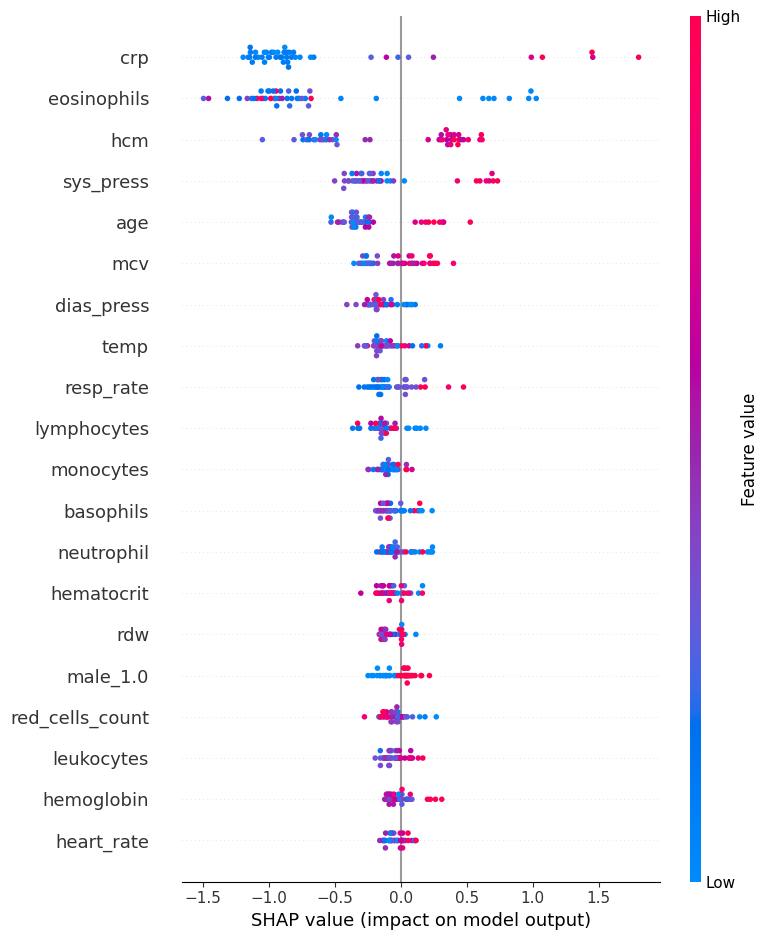

In [71]:
interpret_model(cattuned)
#interpret_model(lgbmtuned)
#interpret_model(xgbtuned)

In [ ]:
# plot_model(xgbtuned, plot='ktops')

### 2.3.1) Build a model with all data
#### Run FINALIZE MODEL only for the best algorithm chosen in the previous lines

In [ ]:
#final_model = finalize_model(cattuned)
#final_model = finalize_model(lgbmtuned)
final_model = finalize_model(xgbtuned)

### 2.3.2) Using model to predict unseen outcome

In [ ]:
str(final_model.__class__.__name__)

In [ ]:
tuned_model_name = str(final_model.__class__.__name__) + '_' + 'tuned' + '_baseline_' + specific_hospital
tuned_model_name

In [ ]:
final_model_name = str(final_model.__class__.__name__) + '_baseline_' \
                    + specific_hospital
final_model_name

In [ ]:
save_model(final_model, final_model_name ,verbose=True)

In [ ]:
final_model
#final_model.get_all_params()

# Use the tuned saved model to predict on specific hospital
PS: I don't finalize the model only in this strategy, because otherwise, it would be trained with the same data that it would be tested, resulting in false better performance

In [ ]:
import pickle
import joblib
from sklearn.metrics import (roc_curve, auc)

baseline_pkl = tuned_model_name + ".pkl"
prep_pipe_baseline, baseline = joblib.load(baseline_pkl)

X_test_baseline = pd.read_csv(x_test_specific_name, delimiter=";",index_col=0)

y_test_baseline = pd.read_csv(y_test_specific_name, delimiter=";",index_col=0)

y_pred_prob_baseline = baseline.predict_proba(X_test_baseline)[:,1]
fpr_baseline , tpr_baseline, thresholds_baseline = roc_curve(y_test_baseline, y_pred_prob_baseline)
auc_baseline = auc(fpr_baseline, tpr_baseline)
auc_baseline

In [ ]:
fig, (ax1) = plt.subplots(1, 1,figsize=(8,6))
# fig.suptitle('Receiver Operating Characteristic')

#############################################
## General VS Specific
#############################################

# ICU AGREGADO E SIMPLES
ax1.set_facecolor('xkcd:white')
ax1.spines['left'].set_color('#000000')
ax1.spines['bottom'].set_color('#000000')
ax1.spines['top'].set_color('#000000')
ax1.spines['right'].set_color('#000000')
# ax1.grid(color='grey', linestyle='solid',alpha=0.3)
ax1.plot([0,1],[0,1], 'k--')

n = 1
#using plasma cmap for each axis
colors = plt.cm.rainbow(np.linspace(0, 1, n))

ci_baseline = AUC_CI(y_test_baseline["class"], y_pred_prob_baseline)

# for i in range(n):

ax1.plot(fpr_baseline, tpr_baseline, label= "Baseline Model - AUC " + str(np.around(ci_baseline,2))
         , color=colors[0], linewidth=2, linestyle=":")

ax1.legend(frameon=True, shadow=True, borderpad=1, facecolor="white")
ax1.set_xlabel("FPR")
ax1.set_ylabel("TPR")

# plt.savefig("sup_fig1.svg")